<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/bbc_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def data_loader(data_path):

    f = open(data_path)
    data = json.load(f)

    return data

def column_selection(selected_column, data) :
    empty_column = []
    for i in data:
        empty_column.append(i[selected_column])

    return empty_column

def data_cleaner(txt_data):
    # if limit != None:
    clean_data = []
    empty_indices = []
    for i in range(len(txt_data)):
        if txt_data[i] != '':
                # print(content[i])
            clean_data.append(txt_data[i])
        else :
            empty_indices.append(i)
    # print(empty_indices)
    return clean_data , empty_indices        

def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            # list_object.pop(idx)
            del list_object[idx] 


def index_returner(df,unique_region):
    x = df[df['region'] == unique_region].index
    return x             

In [3]:
import os 
import json
import pandas as pd 
import numpy as np 
# from data_preprocess import data_loader, column_selection, data_cleaner,delete_multiple_element
import matplotlib.pyplot as plt 
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers
# from tensorflow.keras.layers import *

plt.style.use('ggplot')

In [4]:
input_path = 'drive/MyDrive/bbc_news_list_uk.json'
data = data_loader(input_path)
print(data[0].keys())

dict_keys(['tags', 'title', 'news_post_date', 'raw_content', 'content', 'url', 'author', 'language', '_id', 'region', 'short_description', 'category', 'crawled_at'])


In [5]:
content = column_selection('content', data)
title = column_selection('title', data)
region  = column_selection('region', data)
short_desc = column_selection('short_description', data)
category = column_selection('category', data)

In [6]:
print('content_len:', len(content))
print('title_len:', len(title))
print('region_len:', len(region))
print('desc_len:', len(short_desc))
print('category_len:', len(category))

content_len: 15825
title_len: 15825
region_len: 15825
desc_len: 15825
category_len: 15825


In [7]:
for i in range(len(region)):
    if region[i] == '':
        region[i] = 'NO_INFO'

In [8]:
clean_content,empty_indices_content = data_cleaner(content)

In [9]:
clean_title,empty_indices_title = data_cleaner(title)
clean_region,empty_indices_region = data_cleaner(region)
clean_short_desc,empty_indices_short_desc = data_cleaner(short_desc)
clean_category,empty_indices_category = data_cleaner(category)

In [10]:
print('Content Length :',len(content))
print('Clean Content Length :',len(clean_content))
print('Title Lenght :',len(title))
# print(len(region))

Content Length : 15825
Clean Content Length : 15468
Title Lenght : 15825


In [11]:
# delete_multiple_element(clean_content,empty_indices_content)
delete_multiple_element(clean_title,empty_indices_content)
delete_multiple_element(clean_region,empty_indices_content)
delete_multiple_element(clean_short_desc,empty_indices_content)
delete_multiple_element(clean_category,empty_indices_content)

In [12]:
print('Clean Content Length :',len(clean_content))
print('Clean Title Length :',len(clean_title))
print('Clean Region Length :',len(clean_region))
print('Clean ShortDescription Length :',len(clean_short_desc))
print('Clean Category Length :',len(clean_category))

Clean Content Length : 15468
Clean Title Length : 15468
Clean Region Length : 15468
Clean ShortDescription Length : 15468
Clean Category Length : 15468


In [13]:
df_clean = pd.DataFrame({
    'content': clean_content,
    'title' : clean_title,
    'region' : clean_region,
    'desc' : clean_short_desc,
    'category' : clean_category
})

In [14]:
df_clean.head(2)

,content,title,region,desc,category
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News
1,The eldest son of North Korean leader Kim Jong...,North Korea leader's eldest son 'opposes dynasty',Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News


In [15]:
print('number of region :',df_clean['region'].nunique())
print(df_clean['region'].unique())

number of region : 84
['Health' 'Asia-Pacific' 'Lincolnshire' 'Tayside and Central Scotland'
 'Manchester' 'NE Scotland, Orkney & Shetland' 'US & Canada' 'Cornwall'
 'Surrey' 'England' 'Hereford & Worcester' 'Middle East' 'London'
 'Magazine' 'Stoke & Staffordshire' 'Wales' 'Europe'
 'Glasgow & West Scotland' 'UK Politics' 'Bristol' 'South Asia'
 'Northern Ireland' 'Norfolk' 'UK' 'Business' 'Cambridgeshire'
 'Entertainment & Arts' 'North East Wales' 'Africa' 'Jersey' 'Scotland'
 'South Scotland' 'Wiltshire' 'Northampton' 'Highlands & Islands'
 'Suffolk' 'Cumbria' 'Shropshire' 'Sheffield & South Yorkshire'
 'Beds, Herts & Bucks' 'Coventry & Warwickshire' 'North West Wales'
 'York & North Yorkshire' 'Education & Family' 'Kent' 'South East Wales'
 'Guernsey' 'Technology' 'South West Wales' 'Hampshire & Isle of Wight'
 'Science & Environment' 'Lancashire' 'N. Ireland Politics' 'Somerset'
 'Isle Of Man / Ellan Vannin' 'Sussex' 'Devon' 'Dorset' 'Wales politics'
 'Wear' 'Edinburgh, Fife & Eas

In [16]:
new_df = pd.DataFrame(df_clean.groupby(['region'])['region'].count())
new_df['region']

region
Africa                        293
Asia-Pacific                  356
Beds, Herts & Bucks           143
Berkshire                     118
Birmingham & Black Country    118
                             ... 
Wales politics                 26
Wear                           77
Wiltshire                      81
World                          23
York & North Yorkshire         79
Name: region, Length: 84, dtype: int64

In [17]:
new_df

,region
region,
Africa,293
Asia-Pacific,356
"Beds, Herts & Bucks",143
Berkshire,118
Birmingham & Black Country,118
...,...
Wales politics,26
Wear,77
Wiltshire,81


In [18]:
new_df = new_df.rename(columns = {'region':'counts'})
new_df = new_df.reset_index()
#  df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

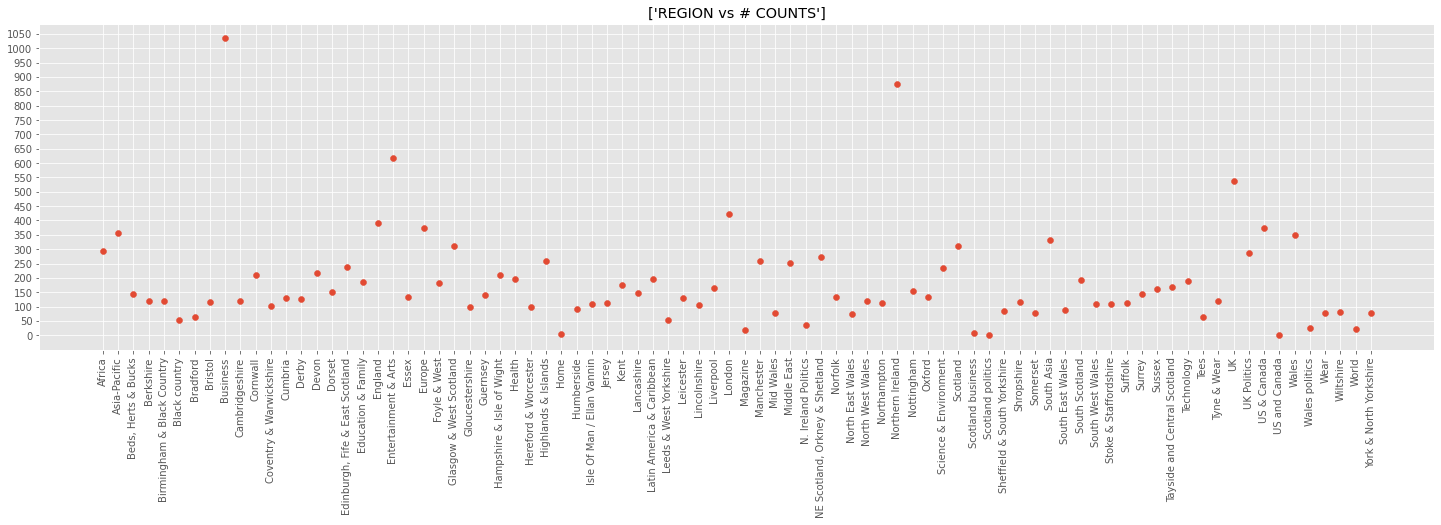

In [19]:
# x = new_df['region']
plt.figure(figsize=(25,6))
plt.scatter(new_df['region'], new_df['counts'])
plt.xticks(rotation=90);
# plt.yaxis.set_ticks(np.arange(0, 1100, 50))
plt.yticks(np.arange(0, 1100, 50));
# plt.ylim([0,650]);
plt.title(['REGION vs # COUNTS']);

In [20]:
region_name = 'London'
x = df_clean[df_clean['region']==region_name]
x.index

Int64Index([   16,    20,   103,   120,   199,   207,   255,   464,   569,
              572,
            ...
            15068, 15115, 15190, 15237, 15296, 15310, 15330, 15332, 15429,
            15442],
           dtype='int64', length=423)

In [21]:
len(x)

423

In [22]:
df_clean.iloc[x.index]

,content,title,region,desc,category
16,Jailed pop star George Michael has been transf...,George Michael moved to Category C Highpoint P...,London,Jailed pop star George Michael is transferred ...,BBC News
20,Three men have been found guilty of murdering ...,Trio guilty of Ben Gardner 'Halloween hat' murder,London,Three men are found guilty of murdering an IT ...,BBC News
103,A council in west London has been criticised f...,London council attacked for asking tenants to ...,London,A council in west London is criticised for cal...,BBC News
120,"Sir Robert Mark, the former Metropolitan Polic...",Police boss who tackled Scotland Yard corrupti...,London,"Sir Robert Mark, the former Metropolitan Polic...",BBC News
199,A sprinter who raced in national competitions ...,Sprinter Matthew Thomas branded 'common criminal',London,A sprinter who raced in national competitions ...,BBC News
...,...,...,...,...,...
15310,Six proposals will be considered to become the...,Six art ideas in running for Trafalgar Square ...,London,Six ideas are put forward for the next artwork...,BBC News
15330,"A man dubbed the ""Tome Raider"" after he stole ...",'Tome Raider' jailed over rare book thefts in ...,London,"A man dubbed the ""Tome Raider"" after he stole ...",BBC News
15332,Peace protesters who have been camping in Parl...,Parliament Square peace protesters are evicted,London,Peace protesters are evicted from Parliament S...,BBC News
15429,A former teacher has been found guilty of abus...,Teacher guilty of abusing boys at London school,London,A 65-year-old man is convicted of sexually abu...,BBC News


In [23]:
def json_maker(query, id, content, title, region, desc):
    return {'query':str(query),'ID':id,'CONTENT':content, 'TITLE':title, 'REGION':region, 'DESCRIPTION':desc}

In [24]:
def info_print(index_num):
    
    print('CONTENT:', df_clean['content'][index_num])
    print('TITLE:', df_clean['title'][index_num])
    print('REGION:', df_clean['region'][index_num])
    print('DESC:', df_clean['desc'][index_num])


In [25]:
info_print(13475)

CONTENT: The team behind the Derry/Londonderry City of Culture 2013 have pitched their final bid to the judging panel.The 10-strong team travelled to Liverpool to give their presentation.Led by Derry City Council's Valerie Watts, the team included Deputy First Minister Martin McGuinness and Junior Minister Robin Newton."Let's hope that the judging panel recognise a place of talent, creativity, energy and strength," said Ms Watts."Being one of the four shortlisted cities is a huge achievement and something we should all be proud of."Derry has been short-listed along with Birmingham, Sheffield and Norwich.The team delivered a 20-minute pitch, followed by 100 minutes of detailed questioning from the judging panel.Mr McGuinness said that following the publication of the Saville Report, people in Derry felt they could now move forward."Some people call it Derry. Others call it Londonderry. But we all call it home," he said."Derry is an inherently creative and resilient city. We have a new s

In [26]:
#### keyword extraction 
# https://huggingface.co/yanekyuk/bert-uncased-keyword-extractor
# https://huggingface.co/Voicelab/vlt5-base-keywords?text=The+biggest+advantage+is+the+transferability+of+the+vlT5+model%2C+as+it+works+well+on+all+domains+and+types+of+text.+The+downside+is+that+the+text+length+and+the+number+of+keywords+are+similar+to+the+training+data%3A+the+text+piece+of+an+abstract+length+generates+approximately+3+to+5+keywords.+It+works+both+extractive+and+abstractively.+Longer+pieces+of+text+must+be+split+into+smaller+chunks%2C+and+then+propagated+to+the+model.
# https://huggingface.co/facebook/bart-large-mnli   zero shot label classification
# eger her content datasinin multilabel halini bulabilirsem belki kontentlerin kesisim kumesini de bulabilirim.
# eger her content datasinin keywordlerini bulabilirsem kesisen keyworleri kullanarak kontentlerin kesisim kumeisni de bulabilirim.
# https://huggingface.co/yanekyuk/bert-keyword-extractor?text=Canadian+Natural+Resources+Minister+Jonathan+Wilkinson+told+Bloomberg+that+the+country+could+start+supplying+Europe+with+liquefied+natural+gas+%28LNG%29+in+as+soon+as+three+years+by+converting+an+existing+LNG+import+facility+on+Canada%E2%80%99s+Atlantic+coast+into+an+export+terminal.+Bottom+line%3A+Wilkinson+said+what+Canada+cares+about+is+that+the+new+LNG+facility+uses+a+low-emission+process+for+the+gas+and+is+capable+of+transitioning+to+exporting+hydrogen+later+on.
# 


clustering


In [38]:
!pip install umap-learn -q
!pip install hdbscan -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [35]:
vector_dir = 'drive/MyDrive/summation_embeddings.npy'
# os.listdir('drive/MyDrive')
embedding_vectors = np.load(vector_dir)

In [40]:
import umap ### dimensionality reduction algorithm
import hdbscan ### clustering algorithm

In [37]:
# We reduce the dimensionality to 5 while keeping the size of the local neighborhood at 15
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embedding_vectors)

In [43]:
cluster = hdbscan.HDBSCAN(
                        min_cluster_size = 15,
                        metric = 'euclidean' ,
                        cluster_selection_method = 'eom'
                        ).fit(umap_embeddings)

In [45]:
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding_vectors)


(0.0, 20.0)

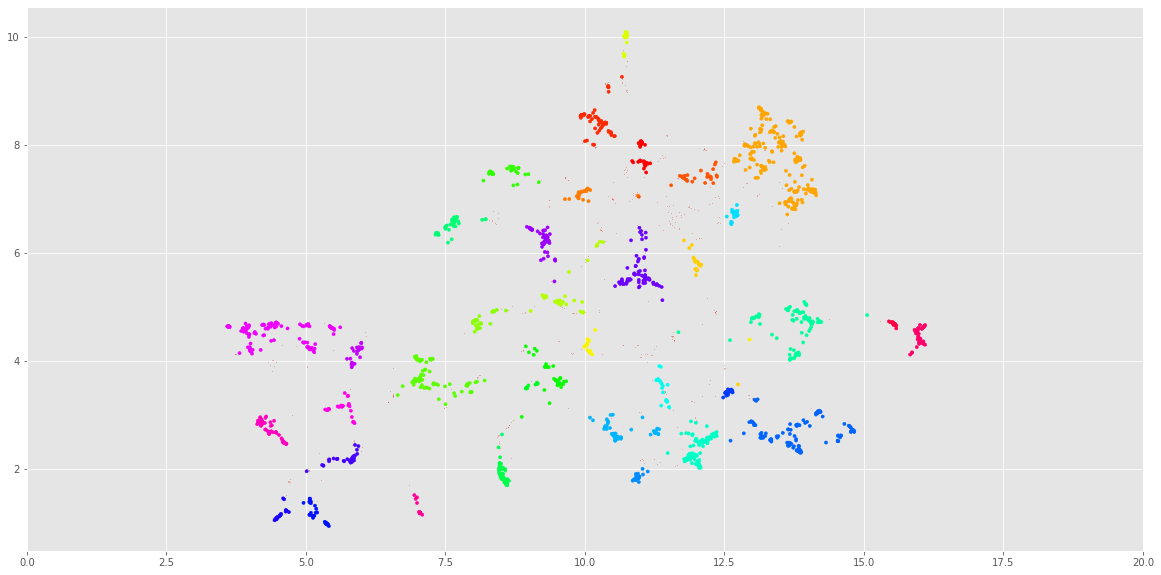

In [61]:
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y,
            # color='#BDBDBD',
            s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10,
            cmap='hsv_r'
            )
plt.xlim([0,20])
# plt.legend([result['labels'].unique()])
# plt.colorbar()

In [47]:
result

,x,y,labels
0,8.449739,6.732603,-1
1,8.676922,2.196244,-1
2,8.961184,6.482584,8
3,7.482664,3.123925,-1
4,7.470929,3.125592,-1
...,...,...,...
2342,12.566989,3.367991,13
2343,12.008976,5.678672,31
2344,13.787008,2.803093,14
2345,13.229710,7.911063,-1


In [48]:
result['labels'].unique()

array([-1,  8, 14, 26, 32,  0, 33, 30, 17, 24, 34, 36, 28, 25, 16, 10,  4,
       22, 29,  5, 12, 11,  6,  3, 20, 35, 31, 13,  7, 21, 19, 18,  9,  2,
       27, 15,  1, 23])